# Линейные методы классификации + оценка качества
Шестаков А.В. Майнор по анализу данных 22/03/2016

Сегодня мы рассмотрим следующие темы

1. Задача классификации
2. Методы линейной классификации
3. Регуляризация линейной регрессии и градиентный спуск

## Задача классификации

На прошлом семинаре мы рассматривали модели регрессии - случай, в котором необходимо было предсказать вещественную переменную $y \in \mathbb{R}^n$ (Стоимость автомобиля, стоимость жилья, размер мозга, объемы продаж и тп.)

В задаче классификации переменная $y$ - содержит метку принадлежности к классу, как, например, это было в задаче с наивным байесом - категорию текстов. Частный случай задачи классификации - бинарная классификация $y = \{-1, 1\}$. Например: является ли клиент банка кредитоспособным, доброкачественная ли опухоль, сообщение - SPAM или HAM?

Спрашивается, почему бы нам не взять, да и построить обычную регрессию на метки класса $y$?<br/>
Загрузите [данные](https://www.dropbox.com/s/g3s1drtaxqwthw1/crx.data?dl=0) о кредитовании. Они достаточно сильно анонимизированны и еще не до конца подходят для применения, но сейчас это нам не помешает. Постройте график наблюдений в координатах `y` и `a15`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


In [4]:
df = pd.read_csv('../data/crx.data',index_col=None) 
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


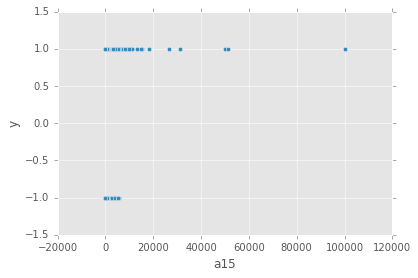

In [5]:
df.plot(x='a15', y='y', kind='scatter')

Почему бы не обучить по этим данным регрессию, предстказывающую значение $y$? Да потому что это ~~бред~~ не очень корректно!

## Методы линейной классификации

Обратимся к слегка идеализированному варианту, линейно разделимой выборке:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

Некоторые геометрические особенности
* $\frac{w_0}{||w||}$ - расстояние от начала координат то прямой
* $\frac{|g(x)|}{||w||}$ - степень "уверенности" в классификациий
* Величину $M = y\langle w, x \rangle = y \cdot g(x)$ называют **отступом**(margin)

Если для какого-то объекта $M \geq 0$, то его классификация выполнена успешно.

Отлично! Значит нам надо просто минимизировать ошибки классификации для всех объектов:

$$L(w) = \sum_i [y^{(i)} \langle w, x^{(i)} \rangle < 0] \rightarrow \min_w$$
Проблема в том, что это будет комбинаторная оптимизация. Существуют различные аппроксимации этой функции ошибок:

<img src='http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/_images/plot_sgd_loss_functions_11.png'>

### Знакомьтесь - Перцептрон!

Это самая простая модель человеческой нейронной сети. В ней есть входы, которые взвешиваются и суммируются. Затем взвешенная сумма проходит через некую функцию активации (в данном случае $sign(\cdot)$).

<img src='https://blog.dbrgn.ch/images/2013/3/26/perceptron.png'>

Перцептрон можно использовать для классификации. <br/>
Существует итерационный алгоритм, который корректирует веса $w_0 \cdots w_n$ до тех пор, пока ошибки имею место быть:
 
```python
Randomly initialize weights: w=(w_0, \dots, w_d)
Until no errors on train set:
    for i in xrange(N):
    if y_i * w.T * x  < 0:
        w = w + alpha * y_i * x_i
```
Этот алгоритм гарантированно сходится для линейно разделимой выборки.
А если это не наш случай?

### Знакомьтесь - Линейная регрессия!

Перед тем как мы начнем, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. Постройте данную фукнцию.

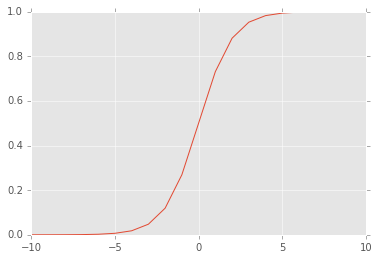

In [6]:
# Your code here
def sigmoid(z):
    return 1./(1+np.exp(-z))

z = np.arange(-10, 10)
s = sigmoid(z)

plt.plot(z, s)

Можно несколькими способами представить линейную регрессию. Один из самых простых - вот какой.

Рассмотрим принадлежность к классу $y=\pm1$ некого объекта $x$: $p(y=\pm1 | x,w)$ и выразим её через **сигмойду** от **отступа**:
$$p(y=\pm1|x,w) = \sigma(y \langle w, x \rangle) $$

А ошибка, которую мы будем минимизировать - логарифмическая:

$$L(w) = -\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle)) \rightarrow \min_w$$

**История с регуляризацией, мультиколлинеарностью и шкалированием признаков здесь полностью повторяется!**

Сгенерируем выборку и применим к ней линейную регрессию

In [7]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

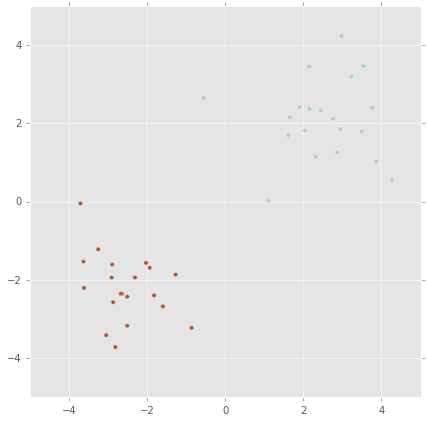

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [9]:
from sklearn.linear_model import LogisticRegression

Обучите LogisticRegression() на данных `X` и `y`, изобразите разделяющую прямую

In [10]:
model = LogisticRegression()
## Your code here

#### Как сделать нелинейную границу?

Рассмотрим набор данных, который в простонародье называют "Бублик".

In [11]:
from sklearn.datasets import make_circles

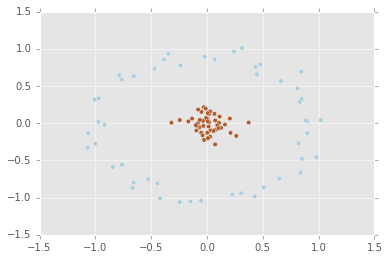

In [12]:
X, y = make_circles(n_samples=100, shuffle=True, noise = 0.1, factor=0.1)
X = X

plt.scatter(X[:, 0],
            X[:, 1],
            c=y,
            cmap=plt.cm.Paired)

Очевидно, что классы нельзя разделить линией. Но можно сделать это окружностью! </br>
Т.е. разделяющся линия теперь будет задаваться не уравнением прямой $g(x) = w_0 + w_1x_1 + w_2x_2$, а уравнением окружности $c(x) = (x_1 - a)^2 + (x_2 - b)^2 - R^2$. 

Выполните преобразование матрицы X, чтобы в ней были столбцы для $x_1$, $x^2_1$, $x_2$, $x^2_1$, 

In [13]:
# Your code here

Обучите логистическую регрессию по полученным признакам. Проверьте, что полученные предсказания совпадают с ответами

In [14]:
model = LogisticRegression(C=1000000, fit_intercept=True)
# Параметр выставлен таким, чтобы отказаться от регуляризации

# Your code here

Нарисуйте разделяющую окружность и исходные данные. 

Вам поможет функция `LogisticRegression.decision_function(X)`, которая возвращает значения $c(X)$ для всех строк из матрицы X. <br/>

Нам нужны только точки, соответствующие $c(x)=0$. поэтому для того, чтобы нарисовать окружность используйте функцию `plt.contour` c параметром `levels=[0]`.

In [ ]:
x0, x1 = np.meshgrid(np.arange(-1.5, 1.5, 0.1),
                       np.arange(-1.5, 1.5, 0.1))
xx0, xx1 = x0.ravel(), x1.ravel()

# Your code here

## Реальные данные + оценка качества

### Предобработка данных

Вновь [данные](https://www.dropbox.com/s/g3s1drtaxqwthw1/crx.data?dl=0) по кредитованию.

Столбец с классом называется `y`.<br/> Значение $1$ соответствует классу клиентов банка, которым выдали кредит и они его успешно вернули.<br/> Значение $-1$ соответствует клиентам, невыполнившим свои кредитные обязанности. 

В банке хотят уметь определять по признакам `a1-a15`, сможет ли новый клиент вернуть кредит или нет? То есть нам надо обучить классификатор! *Обычно, в банках используют скор-карты, но процесс их построения тесно связан с логистической регрессией*

Загрузите данные и преобразуйте признаки `a1`, `a9`, `a10` и `a12` из строковых в числовые. В них только 2 возможных значения. Для этого можно использовать функцию DataFrame.replace() в `pandas` или самое обычное присваивание на соответствующих строках.

In [15]:
df = pd.read_csv('../data/crx.data').dropna()

# Your code here

В признаках `a6`, `a7` присутствуют "редкие" значение. Найдите их с помощью фунцкии `.value_counts()`  и объедините, присвоив им одно и то же значение, например `'Other'`.

In [16]:
# Your code here

Выделите бинарные признаки `a1`, `a9`, `a10` и `a12` в матрицу `X_binary`

Преобразуйте категориальные признаки `a5`, `a6`, `a7`, `a13` с помощью `DictVectorizer`. Вы должны получить матрицу `X_cat`.

Нормализуйте количественные признаки `a2`, `a3`, `a8`, `a11`, `a14` и `a15` с помощью `StandartScaler` или вручную. Вы должны получить матрицу `X_real`.

Матрица `X_cat` будет sparse-матрицой (разреженной). Преобразуте её в полную матрицу с помощью команд `X_cat = X_cat.toarray()` или `X_cat = X_cat.todence()`

Используйте функцию np.concatinate(..) или np.c[..] чтобы сцепить матрицы `X_binary`, `X_cat` и `X_real`

В результате вы должны получить матрицу с преобразованными призанками `X` и вектор ответов `y`

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer

# Your code here

### Применение модели, расчет мер качества

Разделите ваши даннные на обучающую и контрольную выборку в пропорции 70/30 соответственно.

Обучите логистическую регрессию с параметром `penalty='l2'` и `C=1`.

Для контрольной и обучающей выборке:
* Посчитайте матрицу сопряженности
* Посчитайте меры accuracy, precision, recall и f1_score
* Постройте ROC-кривые и посчитайте AUC

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [19]:
# Your code here

## Скользящий контроль. Cross-validation.

Уверены ли мы, что нам не просто повезло, а построенная модель действительно "ловит" классы? <br/>
Какие признаки использовать в конечном счете? <br/>
Как оценивать гипер-параметры моделей (например параметр регуляризации в регрессии)?<br/>

Методами скользящего контроля!

Это называют K-Fold Cross-Validation. Как это проходит:
* Выборку разделяют на K одинаковых частей
* Одну часть данных используют для валидации, а остальные K-1 для обучения модели
* Усредняют меру качества по результатам экспериментов
* Принимают решение (по выбору модели, параметров модели и тп..)

<img src='http://blog-test.goldenhelix.com/wp-content/uploads/2015/04/B-fig-1.jpg'>

In [20]:
from sklearn.cross_validation import KFold

In [21]:
n = y.size
kfold = KFold(n,
              n_folds=3, 
              shuffle=True)

In [23]:
score = np.empty((3,))
i = 0

# Нагруженная версия, чтобы было явно видно, что происходит
for train_idx, test_idx in kfold:
    X_train, y_train = X[train_idx], y[train_idx]
    X_test, y_test = X[test_idx], y[test_idx]
    
    model = LogisticRegression(C=1)
    model.fit(X_train, y_train)
    
    y_hat = model.predict(X_test)
    
    score[i] = recall_score(y_test, y_hat)
    i+=1
    
print(score)

[ 0.  0.  1.]


In [25]:
# Легкая версия
from sklearn.cross_validation import cross_val_score

model = LogisticRegression(C=1)
score = cross_val_score(model, X, y, 
                         cv=kfold,
                         scoring='recall')
print(score)

[ 0.  0.  1.]


Теперь должно быть очевидно, как с помощью кросс-валидации подбирать параметры моделей.
Возьмем, например, параметр `С` для регуляризации:

In [27]:
C_vals = [0.1, 0.2, 0.5, 1, 2, 20000]

for c in C_vals:
    model = LogisticRegression(C=c, penalty='l1')
    score = cross_val_score(model, X, y, 
                             cv=kfold,
                             scoring='recall')
    
    print('C = %.1f, mean = %.3f, std = %.3f'%(c, score.mean(), score.std()))

C = 0.1, mean = 0.000, std = 0.000
C = 0.2, mean = 0.000, std = 0.000
C = 0.5, mean = 0.333, std = 0.471
C = 1.0, mean = 0.481, std = 0.409
C = 2.0, mean = 0.389, std = 0.437
C = 20000.0, mean = 0.333, std = 0.471
